In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the file

In [2]:
# read the data set and basic EDA
df=pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


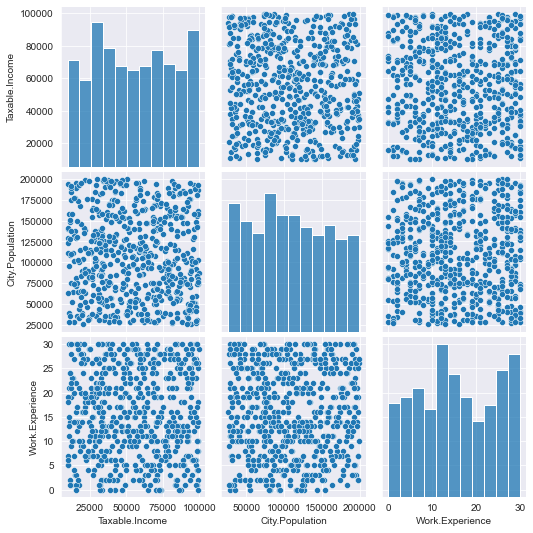

In [8]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [9]:
# create the dummies
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
df['Taxable']=pd.cut(df['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])

In [10]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["Taxable"],drop_first=True)

In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxable_Good
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [12]:
# split the data
X=df_norm.drop(['Taxable_Good'],axis=1)
Y=df_norm['Taxable_Good']

In [13]:
# train and test the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
# model fitting using (criterion='entripy')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

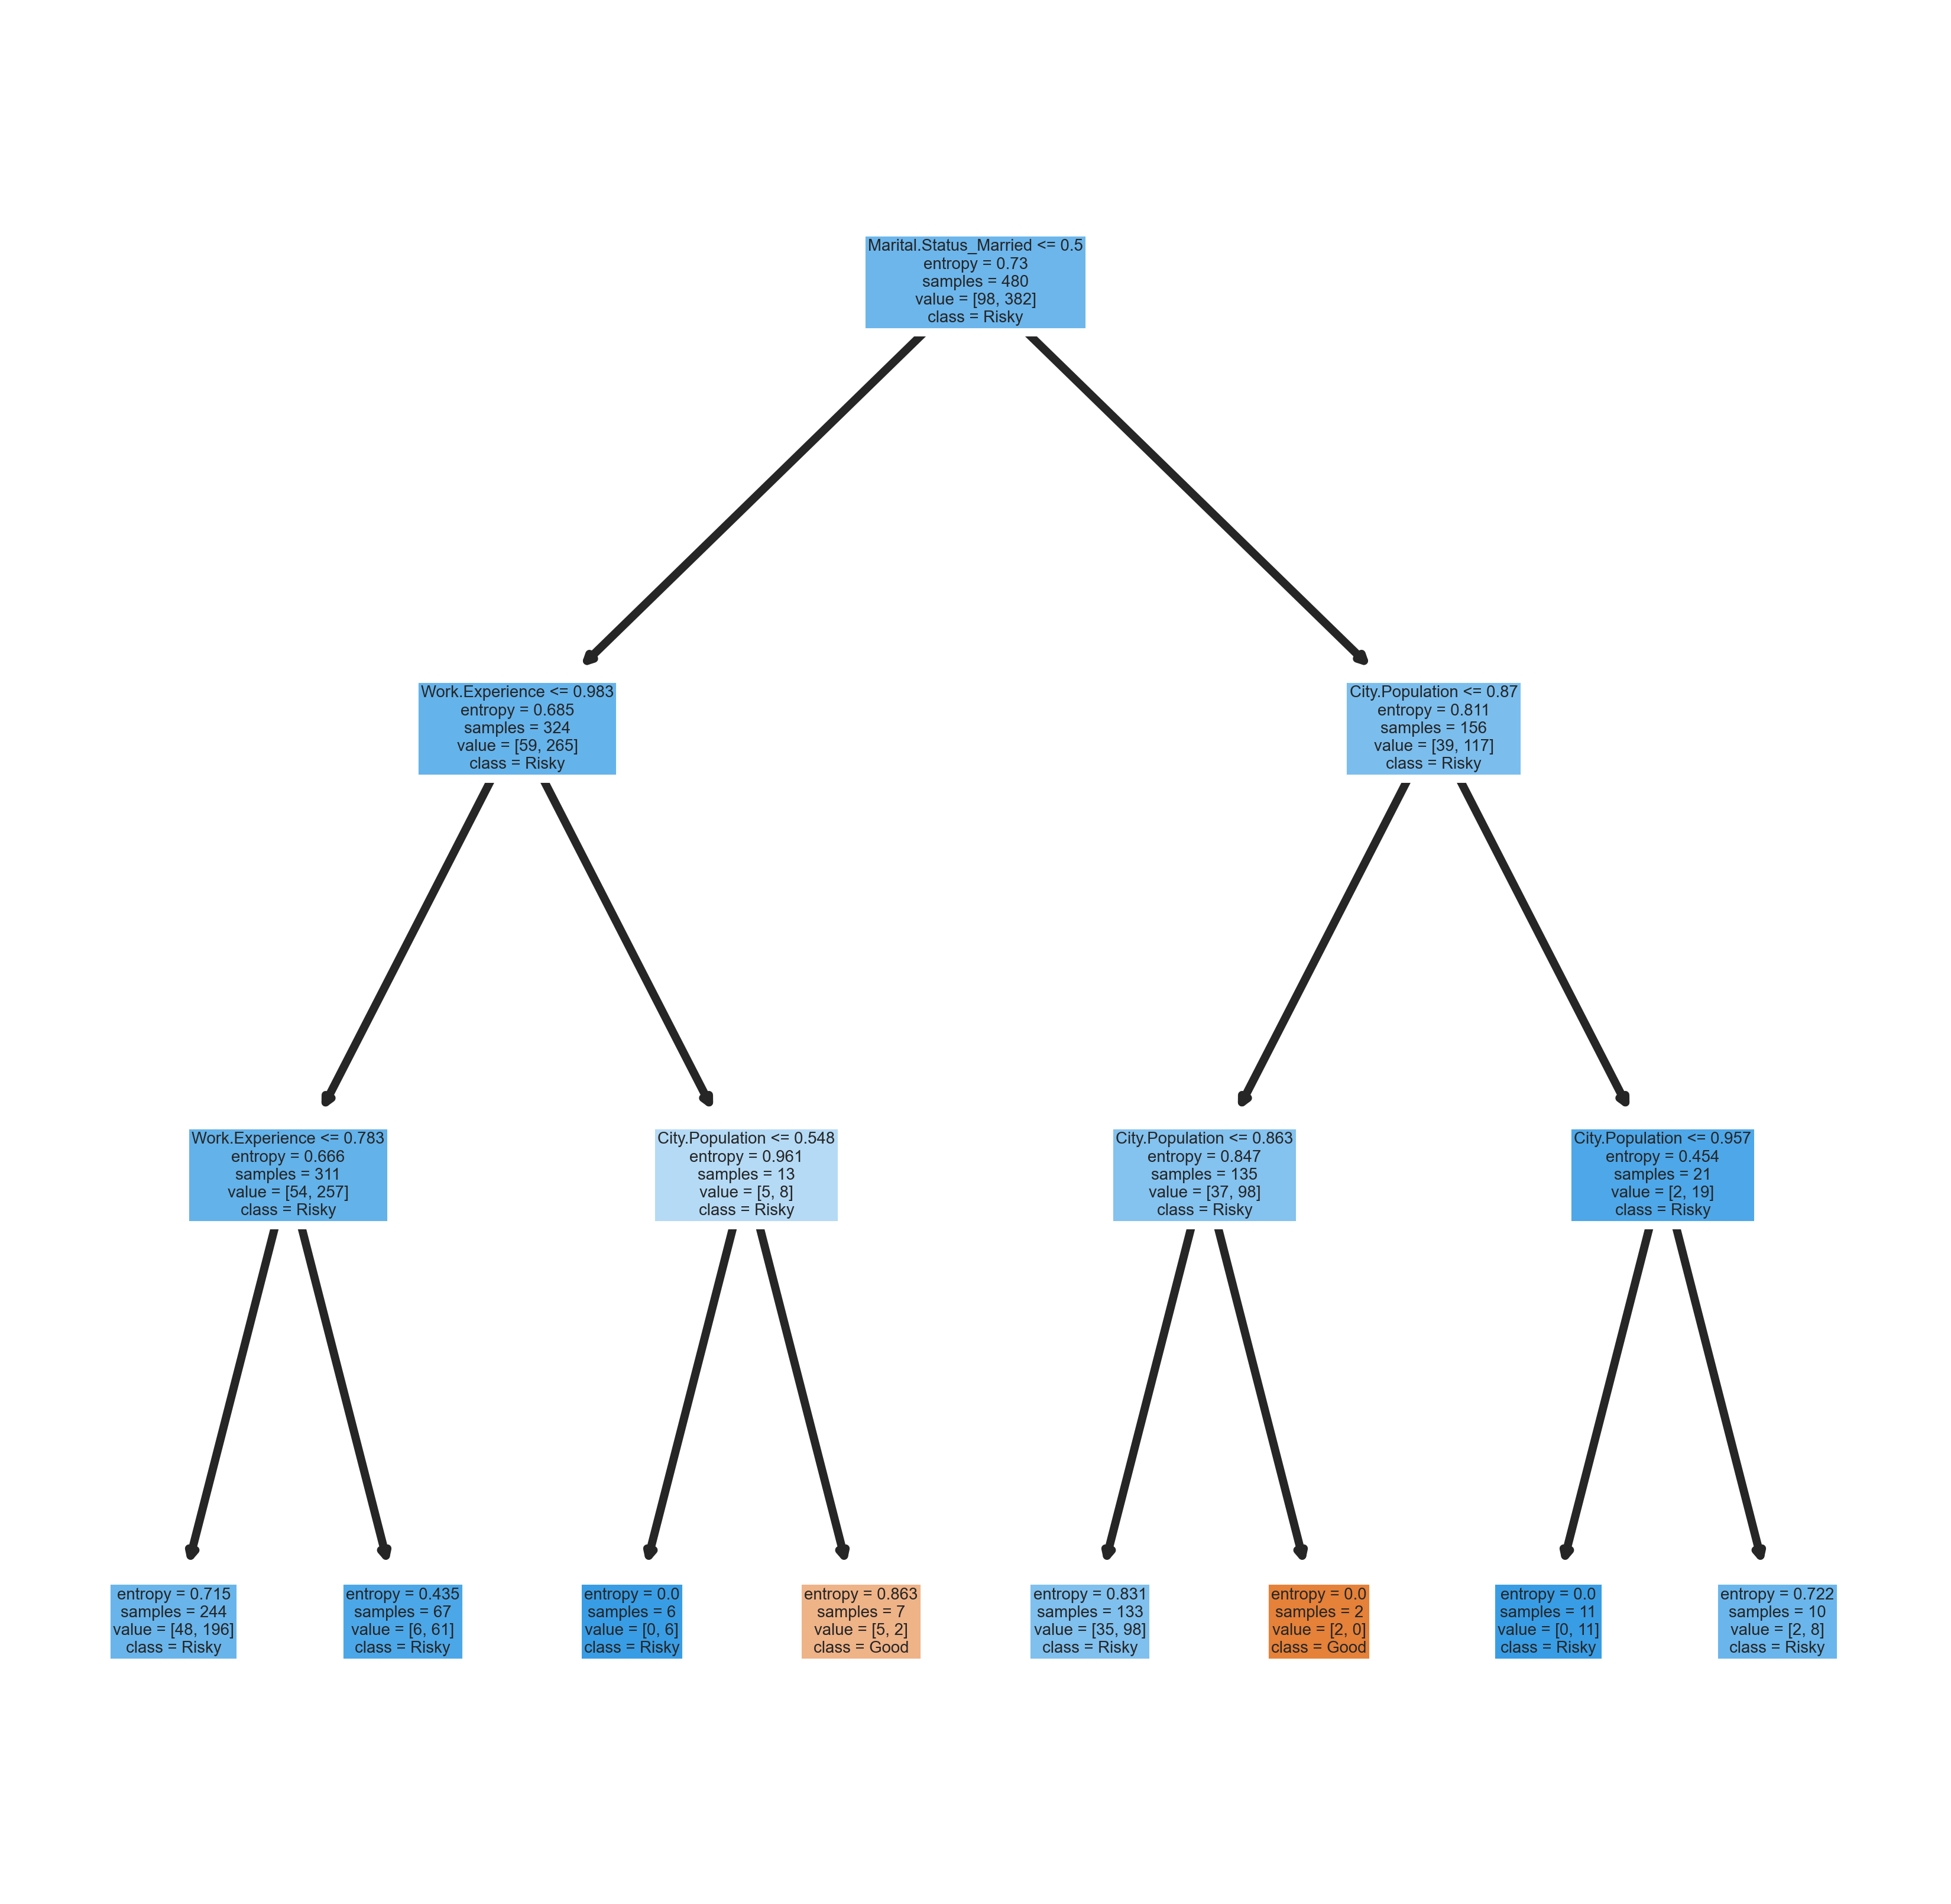

In [15]:
# visualization of tree
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [16]:
# training accuracy
model1.score(X_train,Y_train)

0.80625

In [17]:
# testing accuracy
model1.score(X_test,Y_test)

0.775

In [18]:
# model fitting using (criterion='gini')
model2=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=5,random_state=40)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, max_features=5, random_state=40)

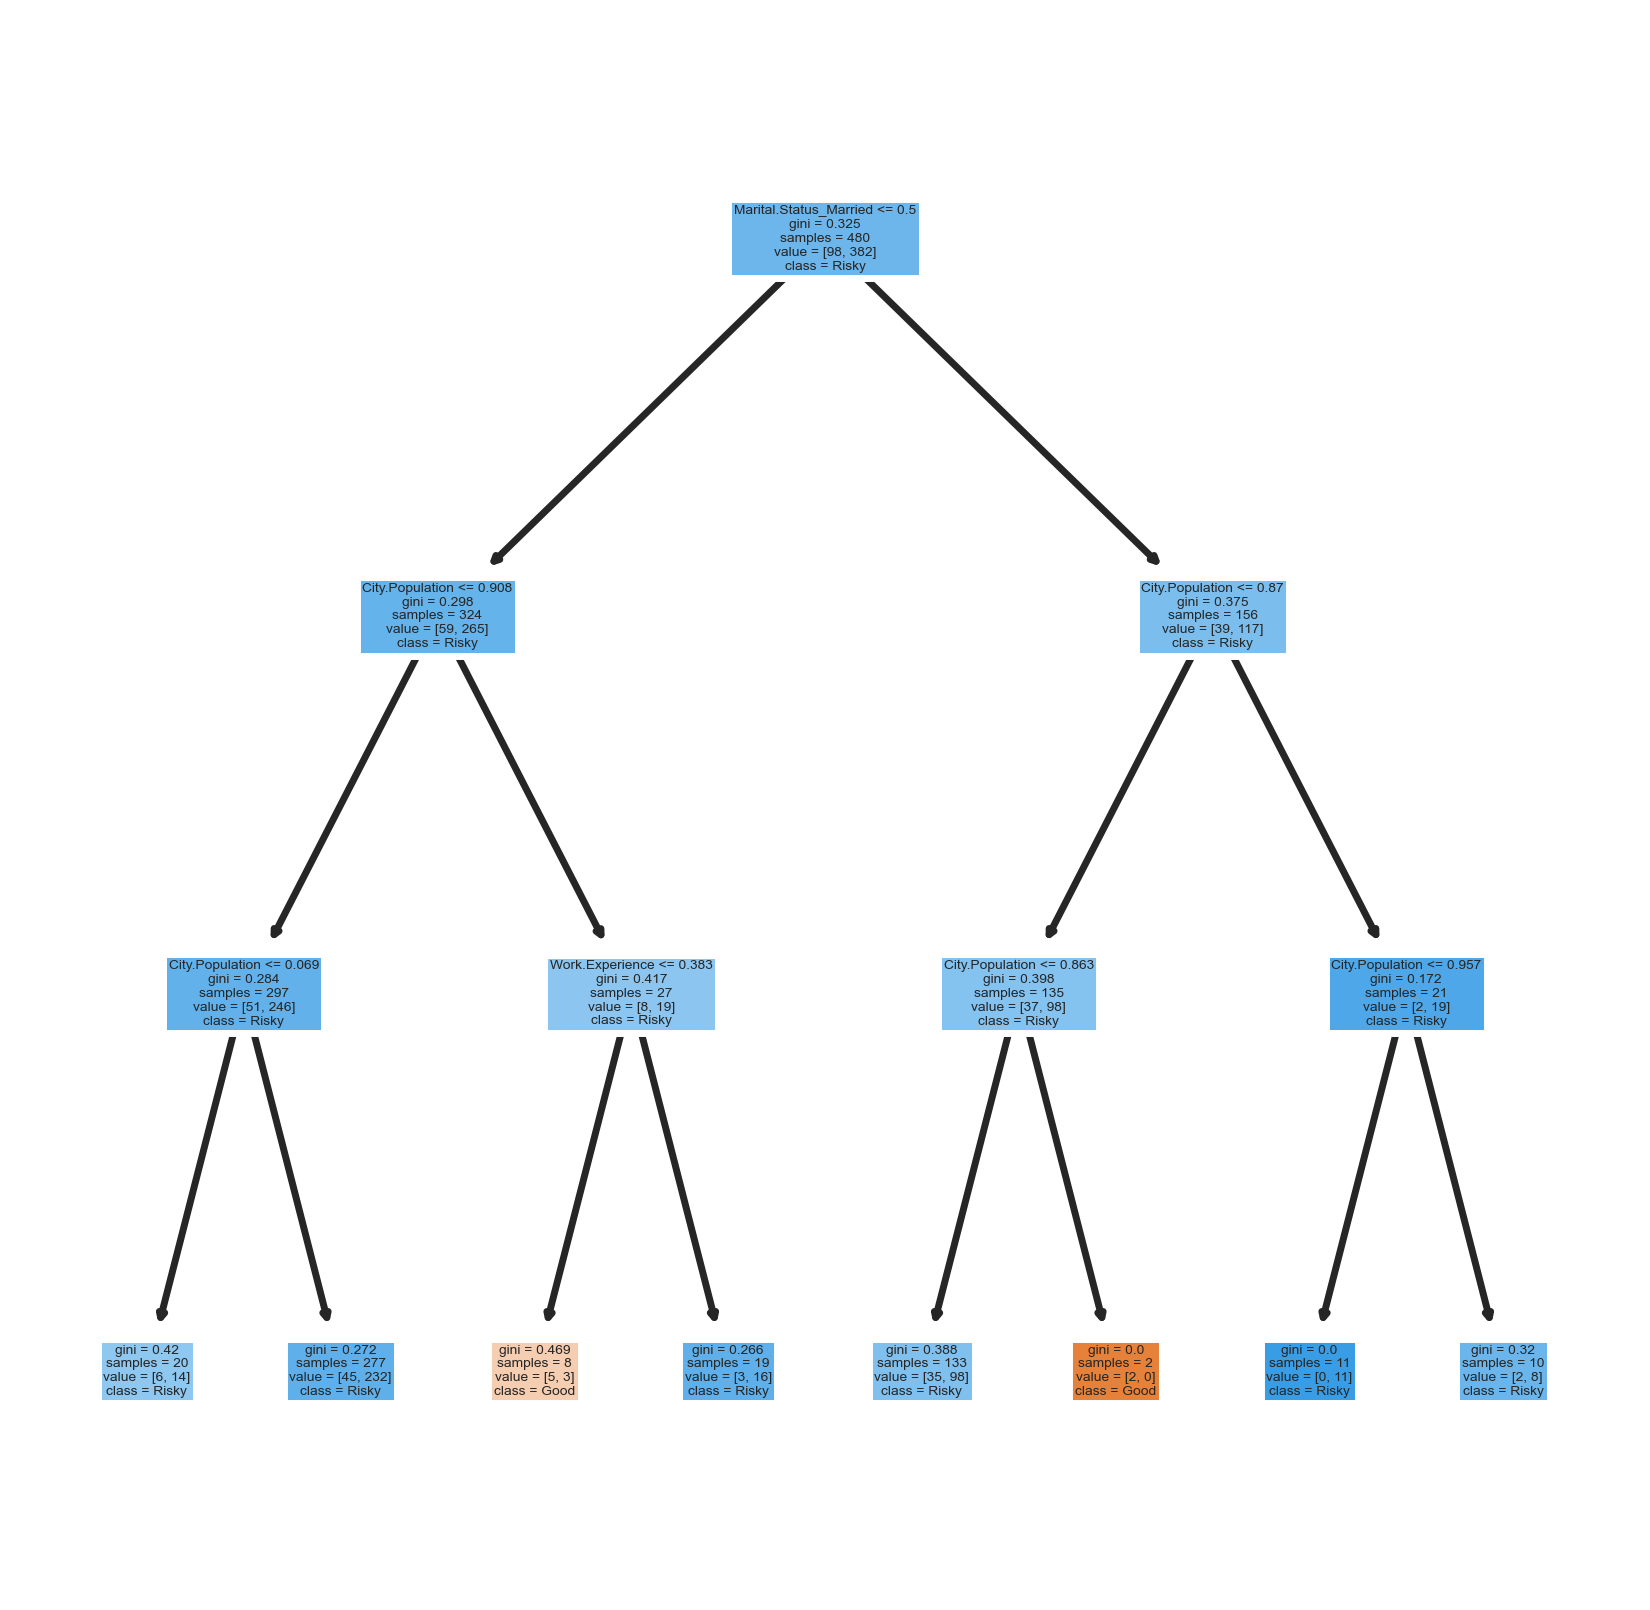

In [19]:
# visualization of tree
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [20]:
# training accuracy
model2.score(X_train,Y_train)

0.8041666666666667

In [21]:
# testing accuracy
model2.score(X_test,Y_test)

0.7916666666666666

# Read the Data set

In [22]:
#read the data set and basic EDA
dt=pd.read_csv('Company_Data.csv')

In [23]:
dt.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
dt.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [26]:
dt.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [27]:
dt.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [28]:
sale_rate=pd.cut(dt['Sales'],bins=[-1,7.490,16.270],labels=['low sales','high sales'])
sale_rate

0      high sales
1      high sales
2      high sales
3       low sales
4       low sales
          ...    
395    high sales
396     low sales
397     low sales
398     low sales
399    high sales
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['low sales' < 'high sales']

In [29]:
dt['Sales']=sale_rate



In [30]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

dt['Sales']=1-LE.fit_transform(dt['Sales'])
dt['ShelveLoc']=LE.fit_transform(dt['ShelveLoc'])
dt['Urban']=LE.fit_transform(dt['Urban'])
dt['US']=LE.fit_transform(dt['US'])


In [31]:
# split the data set
X1=dt.drop(['Sales'],axis=1)
Y1=dt['Sales']

In [32]:
# test and train the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2,random_state=40)

In [33]:
# standerdize the data 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [34]:
# model fitting using ( criterion='entropy')
model3=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

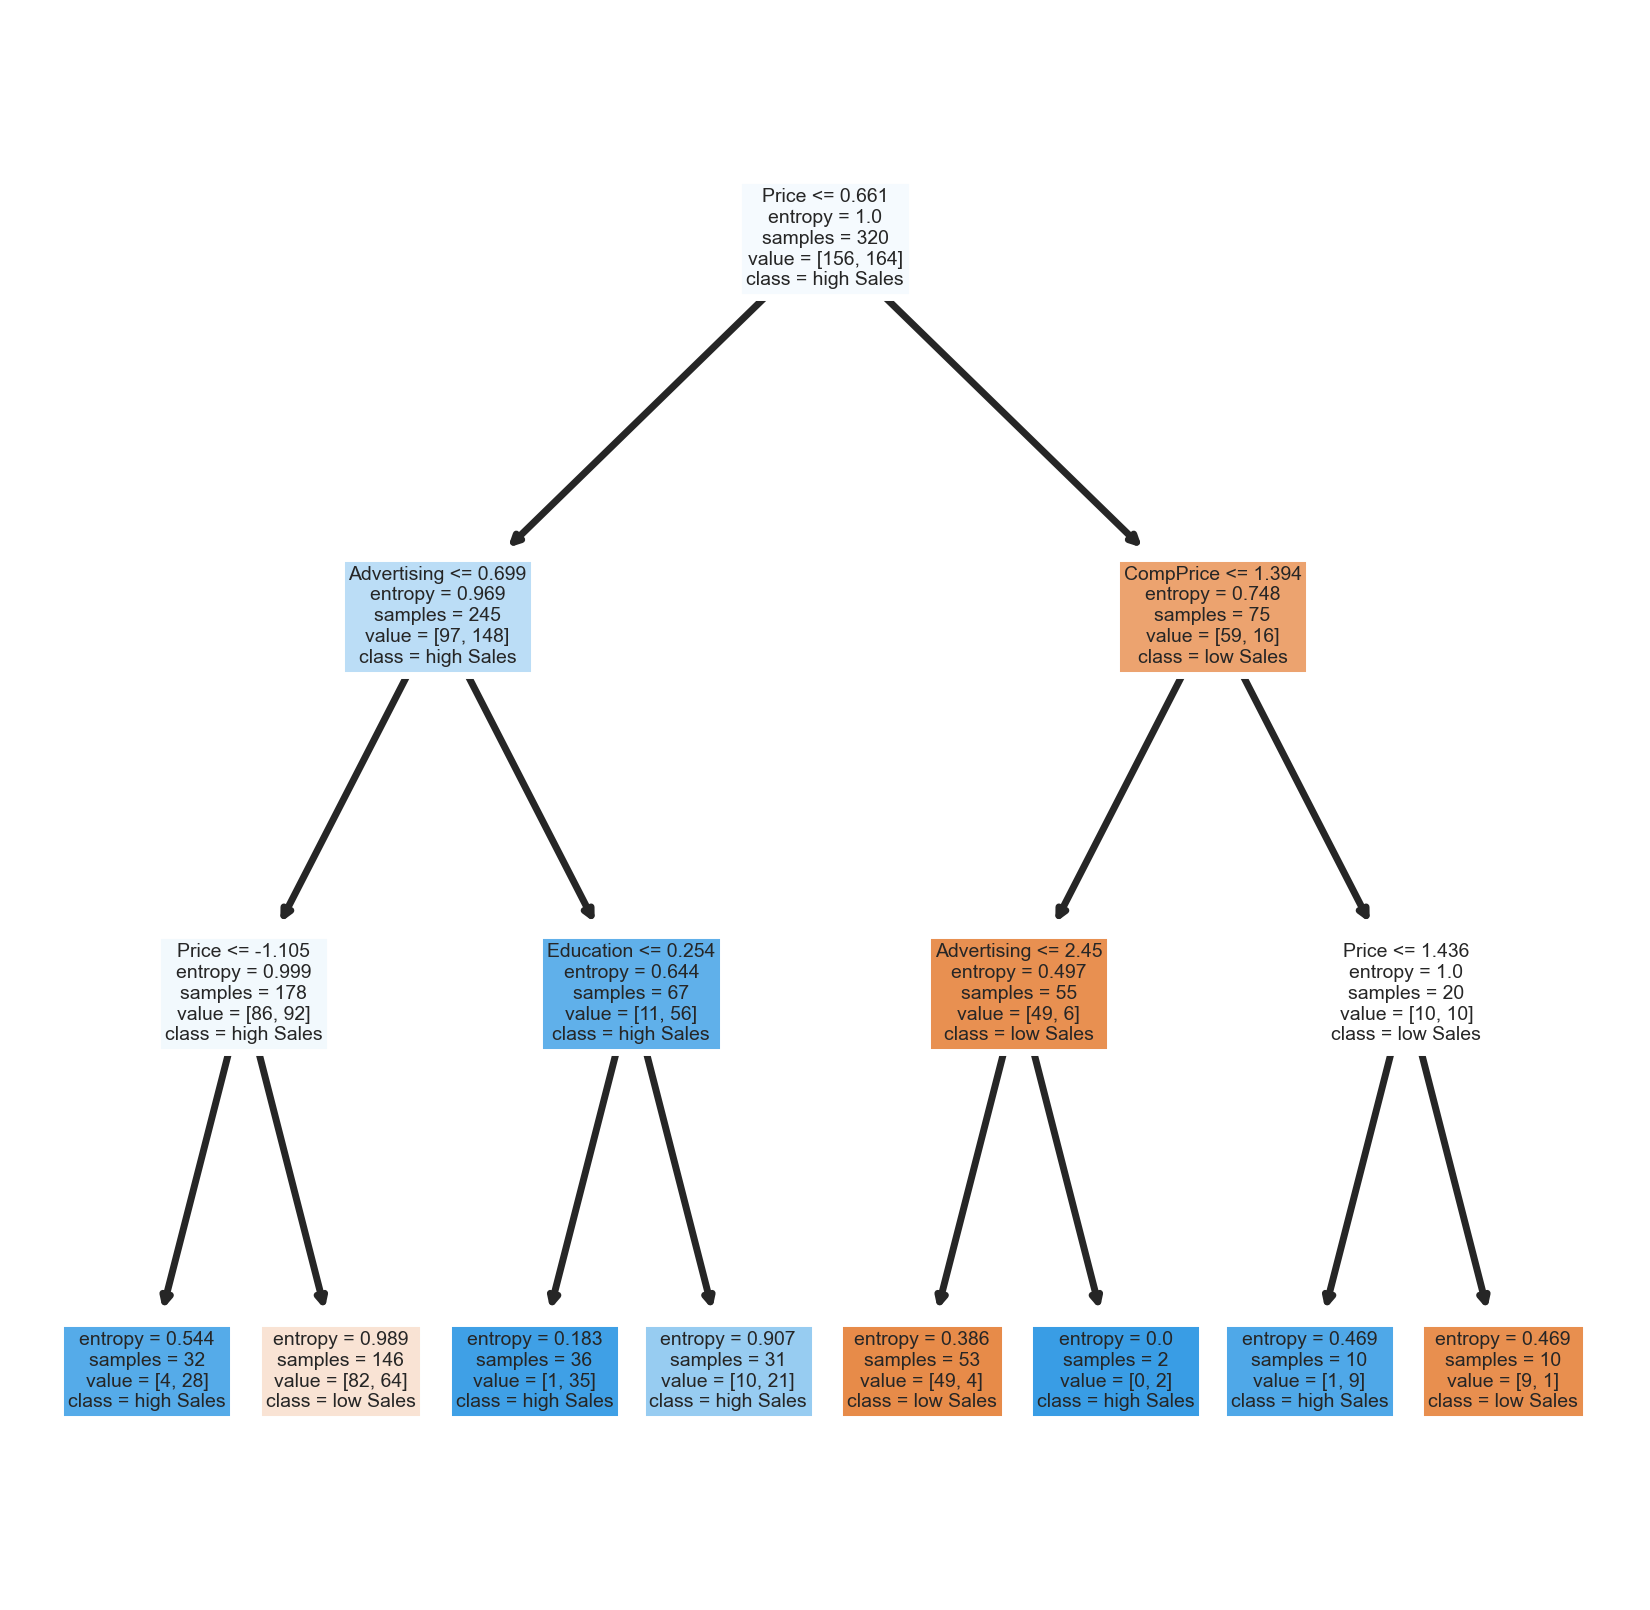

In [35]:
# visualization of the tree
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US','ShelveLoc']
cn=["low Sales","high Sales"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model3,
               feature_names = fn, 
               class_names=cn,
               filled = True); 


In [36]:
# training accuracy
model3.score(x_train,y_train)

0.734375

In [37]:
# testing accuracy
model3.score(x_test,y_test)

0.6875

In [38]:
# model fitting using the ( Criterion='gini')
model4=DecisionTreeClassifier(criterion='gini',max_depth=3)
model4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

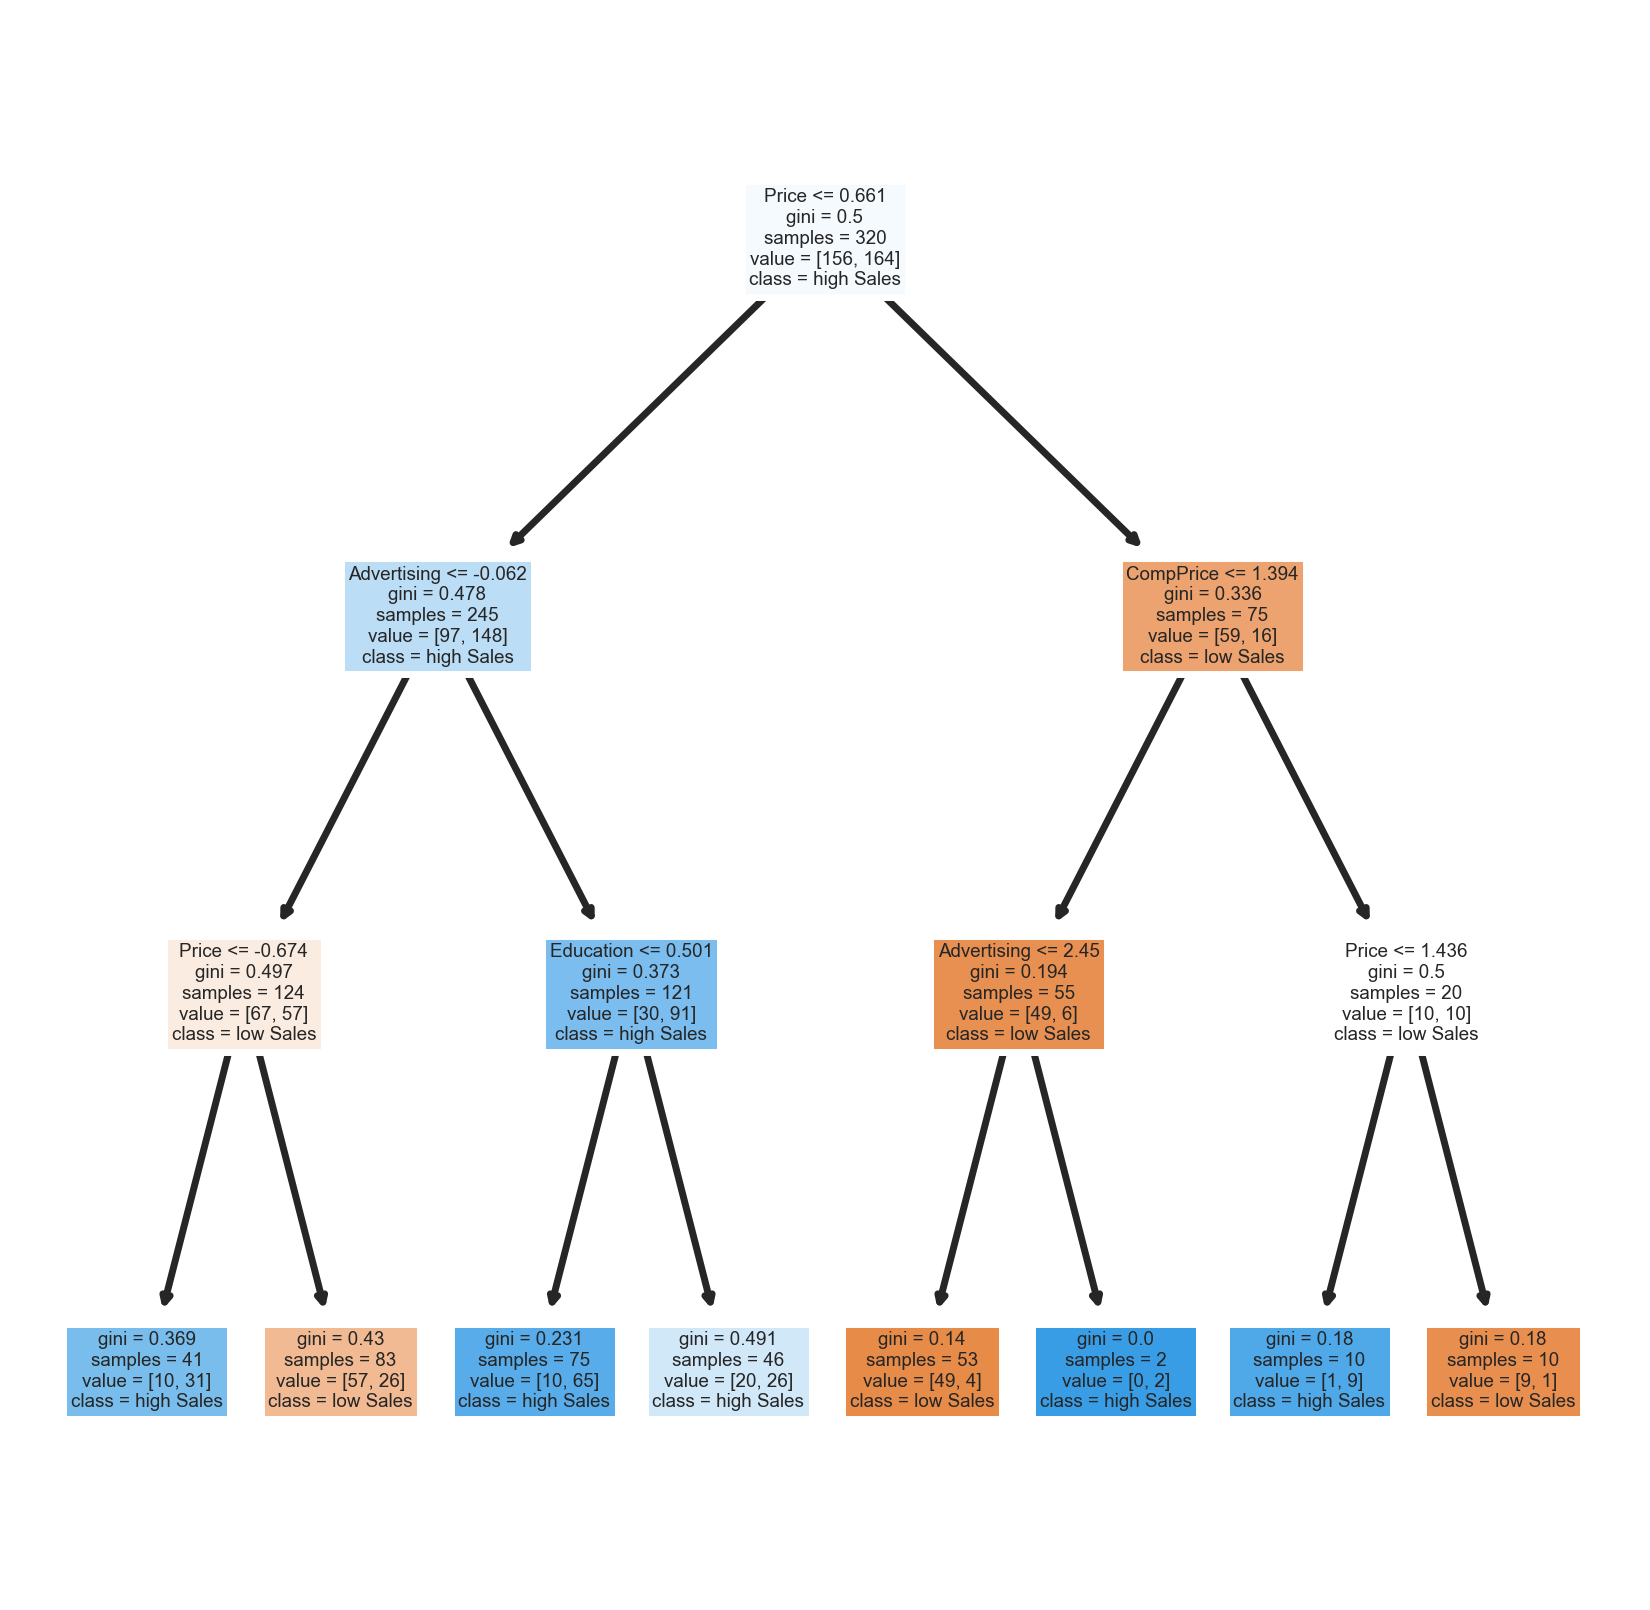

In [39]:
# visualization of tree
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US','ShelveLoc']
cn=["low Sales","high Sales"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model4,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [40]:
# training accuracy
model4.score(x_train,y_train)

0.775

In [41]:
# testing accuracy
model4.score(x_test,y_test)

0.7125